In [36]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
#Loading IOT Dataset
d1=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatest.txt")
d2=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatest2.txt")
d3=pd.read_csv("/content/drive/MyDrive/AIOT_3rd_sem/LABS_PRACTICALS/datatraining.txt")


In [38]:
#concating data
df=pd.DataFrame(pd.concat([d1,d2,d3], ignore_index=True))

In [39]:
#first three data rows
df.head(3)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.718,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.730,26.230,572.666667,769.666667,0.004765,1


In [40]:
#splitting sensor features and target
x=np.array(df.iloc[:,1:6]).reshape(len(df),5)
y=np.array(df.iloc[:,6]).reshape(len(df),)

In [41]:
x.shape

(20560, 5)

In [42]:
y.shape

(20560,)

In [43]:
#Split into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
xtrain.shape

(16448, 5)

In [45]:
ytrain.shape

(16448,)

In [46]:
xtest.shape

(4112, 5)

In [47]:
ytest.shape

(4112,)

In [48]:
#Normalize data
scaler=StandardScaler()
xtrain_t=scaler.fit_transform(xtrain)
xtest_t=scaler.transform(xtest)

In [49]:
#Train clustering models
kmeans=KMeans( n_clusters=20, init='k-means++', max_iter=300, random_state=72)
kmeans

KMeans(n_clusters=20, random_state=72)

In [50]:
kmeans.fit(xtrain_t)
ytrain_pred=kmeans.predict(xtrain_t)

In [51]:
#mapping clusters to occupancy labels
np.unique(ytrain_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [52]:
decision_dict={}
for cluster in np.unique(ytrain_pred):
    decision_dict[cluster]=[0,0]

In [53]:

for i in range(len(ytrain)):
    if ytrain[i]==1:
        decision_dict[ytrain_pred[i]][1] += 1
    else:
        decision_dict[ytrain_pred[i]][0] += 1


In [54]:
def cluster_map(cluster_id):
    if decision_dict[cluster_id][1]> decision_dict[cluster_id][0]:
        return 1
    else:
        return 0

In [55]:
yt_predict =[]
for i in range(len(ytrain_pred)):
    yt_predict.append(cluster_map(ytrain_pred[i]))


In [56]:
yt_predict=np.array(yt_predict)
yt_predict.shape

(16448,)

In [57]:
#Predict occupancy
ytest.shape

(4112,)

In [58]:
ytest_pred=kmeans.predict(xtest_t)

In [59]:
y_test_predict =[]
for i in range(len(ytest_pred)):
    y_test_predict.append(cluster_map(ytest_pred[i]))


In [60]:
y_test_predict=np.array(y_test_predict)
y_test_predict.shape

(4112,)

In [61]:
#Apply automation rules


In [62]:
def csv_predict_percept(i):
    temp=xtest[i,0]
    hum=xtest[i,1]
    opt=xtest[i,2]
    co2=xtest[i,3]
    hratio=xtest[i,4]
    return (temp,hum,opt,co2,hratio)

In [63]:
def csv_predict_occupation(i):
    return y_test_predict[i]

In [64]:
#logic for automation
def csv_predict_decision(i):
    t,h,l,c,hr=csv_predict_percept(i)
    m=csv_predict_occupation(i)
    if m==1:
        fan="on" if t>28.0 else "off"
        light="on" if l<200.0 else "off"
        ac="on"
    else:
        ac,fan,light="off","off","off"

    print(f"Perception := Temprature : {t} , Humidity : {h} , Light : {l} , Motion : {m}")
    print(f"Action := fan : {fan} , ac : {ac} , light : {light}")



In [65]:
#simulation loop
for i in range(5):
    csv_predict_decision(i)

Perception := Temprature : 19.23 , Humidity : 30.6333333333333 , Light : 6.0 , Motion : 0
Action := fan : off , ac : off , light : off
Perception := Temprature : 20.29 , Humidity : 31.29 , Light : 0.0 , Motion : 0
Action := fan : off , ac : off , light : off
Perception := Temprature : 20.84 , Humidity : 30.745 , Light : 0.0 , Motion : 0
Action := fan : off , ac : off , light : off
Perception := Temprature : 19.5 , Humidity : 27.0 , Light : 24.0 , Motion : 0
Action := fan : off , ac : off , light : off
Perception := Temprature : 21.5 , Humidity : 24.1 , Light : 0.0 , Motion : 0
Action := fan : off , ac : off , light : off


In [66]:
#Evaluate models
print("KMeans - Training Accuracy : ",accuracy_score(ytrain,yt_predict))
print("KMeans - Testing Accuracy : ",accuracy_score(ytest,y_test_predict))

KMeans - Training Accuracy :  0.9821862840466926
KMeans - Testing Accuracy :  0.9785992217898832


In [67]:
#Visualize results
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [68]:
cm = confusion_matrix(ytest, y_test_predict, labels=[0,1])
cm

array([[3125,   82],
       [   6,  899]])

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])


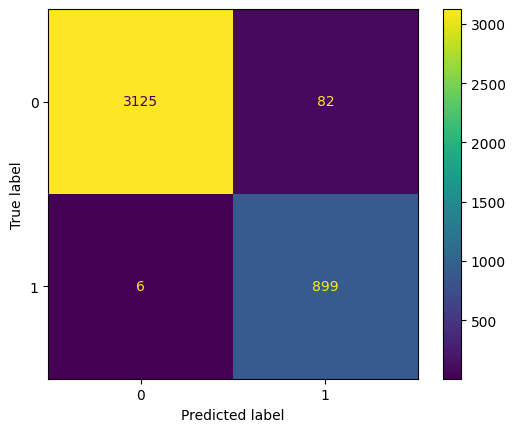

In [70]:
disp.plot()